In [1]:
#pip install gensim

In [2]:
#pip install nltk

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('IMDB Dataset.csv')
df = df.iloc[:10000]

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [8]:
df['sentiment'].value_counts()

positive    5028
negative    4972
Name: sentiment, dtype: int64

In [9]:
import re
def removeTags(text):
    clean = re.sub(re.compile('<.*?>'),'',text)
    return clean

In [10]:
df['review'] = df['review'].apply(removeTags)

In [11]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [12]:
from nltk.corpus import stopwords
import string

In [13]:
def removeStopWords(text):
    new = []
    for i in text.split():
        if i.lower() not in stopwords.words('english'):
            new.append(i)
    x=new[:]
    new.clear()
    return ' '.join(x)

def removePunc(text):
    return text.translate(str.maketrans('','',string.punctuation))

In [14]:
df['review'] = df['review'].apply(removePunc)

In [15]:
df['review'] = df['review'].apply(removeStopWords)

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

In [17]:
df.head()

,review,sentiment
0,One reviewers mentioned watching 1 Oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,Basically theres family little boy Jake thinks...,0
4,Petter Matteis Love Time Money visually stunni...,1


In [18]:
df['review'] = df['review'].apply(lambda x: x.lower())

In [19]:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1


In [20]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from wordcloud import WordCloud
wc = WordCloud(height=500, width=500, min_font_size=10, background_color='white')

In [22]:
pos_wc = wc.generate(df[df['sentiment']==1]['review'].str.cat(sep=' '))

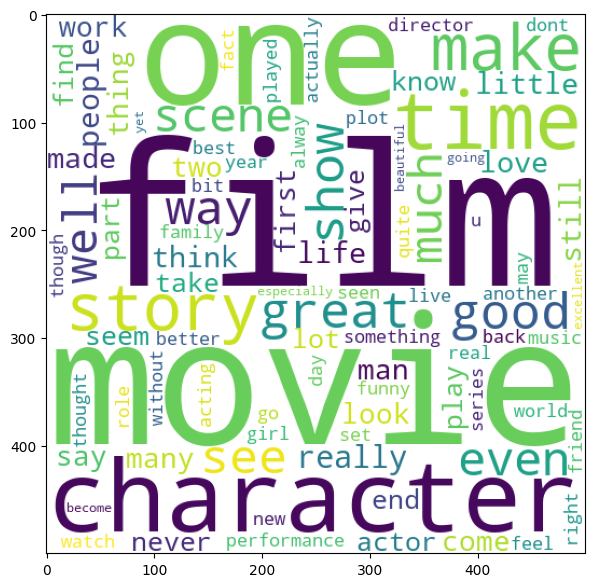

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.imshow(pos_wc)

In [24]:
pos_corpus = []
for i in (df[df['sentiment']==1]['review']).tolist():
    for word in i.split():
        pos_corpus.append(word)

In [25]:
len(pos_corpus)

601399

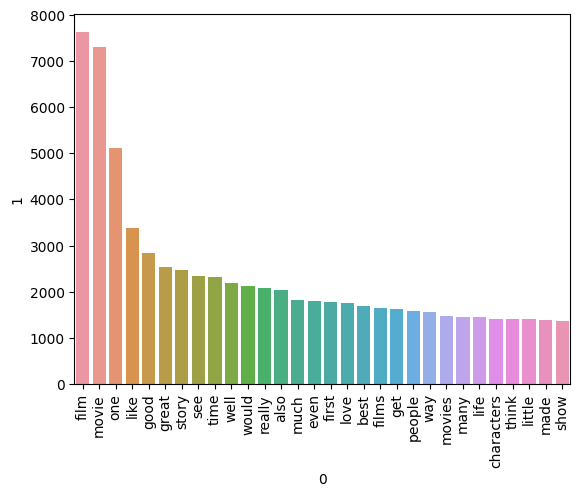

In [26]:
from collections import Counter
import seaborn as sns

most_pos = pd.DataFrame(Counter(pos_corpus).most_common(30))
plt.xticks(rotation='vertical')
sns.barplot(x=most_pos.iloc[:,0], y=most_pos.iloc[:,1])
plt.show()

In [27]:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['review']).toarray()

In [29]:
y = df['sentiment']

In [30]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
rf.score(X_test,y_test)

0.837

In [34]:
X_test[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [35]:
rf.predict([X_test[797]])

array([1])

In [42]:
def generateSentiment(text):
    text = removeStopWords(text)
    text = removePunc(text)
    t = tfidf.transform([text]).toarray()
    if rf.predict(t)[0] == 0:
        return 'Negative'
    else:
        return 'Positive'

In [43]:
print(generateSentiment("Only BGM and entry , entry and entry of SRK at every scene. I don't need soth led directores. There was a time when everyone liked movies of SRK like My name is khan , Don-2 , Chennai Express These are the movies that defined the acting of SRK. These type of mass movie suits south stars and the audience of the south. I want that version of SRK that is very creative in its script and acting. From a very long time he is doing kovies with a very normal script. I believe in Raj kumar Hirani Diecrtion and he will do justice with him and Dunki is going to be a massive success for him. But for this direction was good but the script was poor. And with too much of bgm the character of the movie got lost and everyone around me in the theatre was disappointed."))

Negative


In [38]:
import pickle

pickle.dump(rf, open('rand_forest_1.pkl','wb'))

In [39]:
import gradio as gr

In [46]:
intf = gr.Interface(generateSentiment, "text", "text")
intf.launch(share=True)

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://904575de48f63aed36.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
